In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import Operators as op
import SensingMatrix as sm
import Measurements as me
from SetUpImage import setUpImage
from Displays import phase_retrie_plots

(1.2656192843411966+0j)


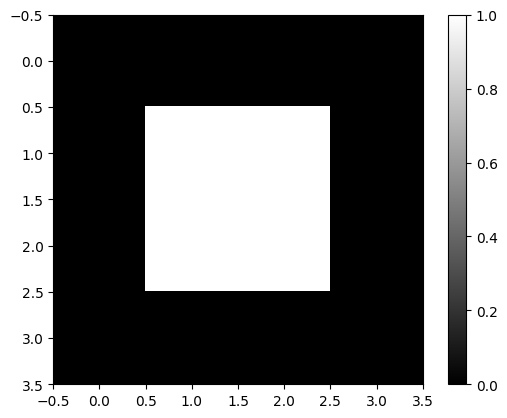

In [9]:
Nx, Ny = 4, 4
true_images = setUpImage(Nx, Ny) 
x_true = true_images[0]
x_true_vect = x_true.reshape(Nx * Ny, )
A = sm.FourierMatrix(Nx,Ny) #sm.iid_stdd_Gauss(Nx,Ny)

noise_lvl = 1.e-4
meas = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
map = op.operators(algo = 'default' , meas = meas, A = A) #complex mirror
#map.f(x_true) < 1e-5


plt.imshow(x_true.real, cmap='gray')
plt.colorbar()